In [1]:
#1. import libraries 
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Dense, GRU

In [2]:
# 2. Read csv file 
df = pd.read_csv('D:\CTG.csv')
df =df.reset_index()['Price']
df

0       10379.9
1       10318.5
2       10257.0
3       10195.6
4       10195.6
         ...   
2466    26700.0
2467    26050.0
2468    26500.0
2469    26550.0
2470    26550.0
Name: Price, Length: 2471, dtype: float64

In [3]:
# 3. Scale data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4.Train 7 Test 3
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [5]:
# 5.Create Dataset
import numpy
# convert an array of values into a dataset matrix, split data into time column
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 8. Define GRU Model
model = xgb.XGBRegressor(
             colsample_bynode=1, colsample_bytree=1, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42)

In [8]:
# 9. Fit model, train
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=8,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [9]:
# 10. Predcit data 
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

In [10]:
# 11. y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred.reshape(-1,1))

In [11]:
train_size1 = int(0.7 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]

# re make predictions on the testing set
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [12]:
# 11. accurate algorithms
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Testing RMSE:', round(test_rmse, 3))

#MAPE
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Testing MAPE:', round(test_mape, 3))

#MAE
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Testing MAE:', round(test_mae, 3))

#MSLE
msle = np.mean((np.log1p(y_pred) - np.log1p(y_test1))**2)
print('MSLE:', round(msle, 3))

Testing RMSE: 5586.812
Testing MAPE: 14.5
Testing MAE: 4577.745
MSLE: 0.036


In [13]:
# next 30 days
pred_next = np.array([])

# change data input 
y_predict_to_next = scaler.fit_transform(np.array(y_test1[-time_step:].reshape(1, -1)).reshape(-1, 1))

for i in range(30):
    print(y_predict_to_next)
    y_pred_next = model.predict(y_predict_to_next.reshape(1, -1))
    y_predict_to_next = np.append(y_predict_to_next, y_pred_next[0])[1:]

    pred_next = np.append(pred_next, y_pred_next[0])

# nghich dao
next30days_predict_inverse = pd.DataFrame(scaler.inverse_transform(pred_next.reshape(-1, 1)))


[[0.60839161]
 [0.6993007 ]
 [0.67832168]
 [0.69230769]
 [0.91608392]
 [0.91608392]
 [0.9020979 ]
 [0.78321678]
 [0.84615385]
 [0.87412587]
 [0.88811189]
 [0.88111888]
 [0.91608392]
 [0.65034965]
 [0.83216783]
 [0.76923077]
 [0.73426573]
 [0.7972028 ]
 [0.71328671]
 [0.71328671]
 [0.72727273]
 [0.84615385]
 [0.8951049 ]
 [0.92307692]
 [0.92307692]
 [0.92307692]
 [0.87412587]
 [0.81818182]
 [0.87412587]
 [0.90909091]
 [1.        ]
 [0.93706294]
 [0.83916084]
 [0.84615385]
 [0.83916084]
 [0.79020979]
 [0.78321678]
 [0.52447552]
 [0.59440559]
 [0.69230769]
 [0.67132867]
 [0.55944056]
 [0.54545455]
 [0.42657343]
 [0.3986014 ]
 [0.28671329]
 [0.37062937]
 [0.43356643]
 [0.45454545]
 [0.48251748]
 [0.4965035 ]
 [0.45454545]
 [0.38461538]
 [0.35664336]
 [0.32167832]
 [0.35664336]
 [0.46853147]
 [0.45454545]
 [0.48251748]
 [0.41258741]
 [0.32167832]
 [0.3006993 ]
 [0.22377622]
 [0.23076923]
 [0.18881119]
 [0.30769231]
 [0.27272727]
 [0.34965035]
 [0.34965035]
 [0.44755245]
 [0.48251748]
 [0.46

In [14]:
next30days_predict_inverse

,0
0,26615.958822
1,26607.909209
2,26647.360596
3,26680.688193
4,26681.531324
5,26695.296612
6,26703.150984
7,26723.693918
8,26741.028140
9,26751.855444


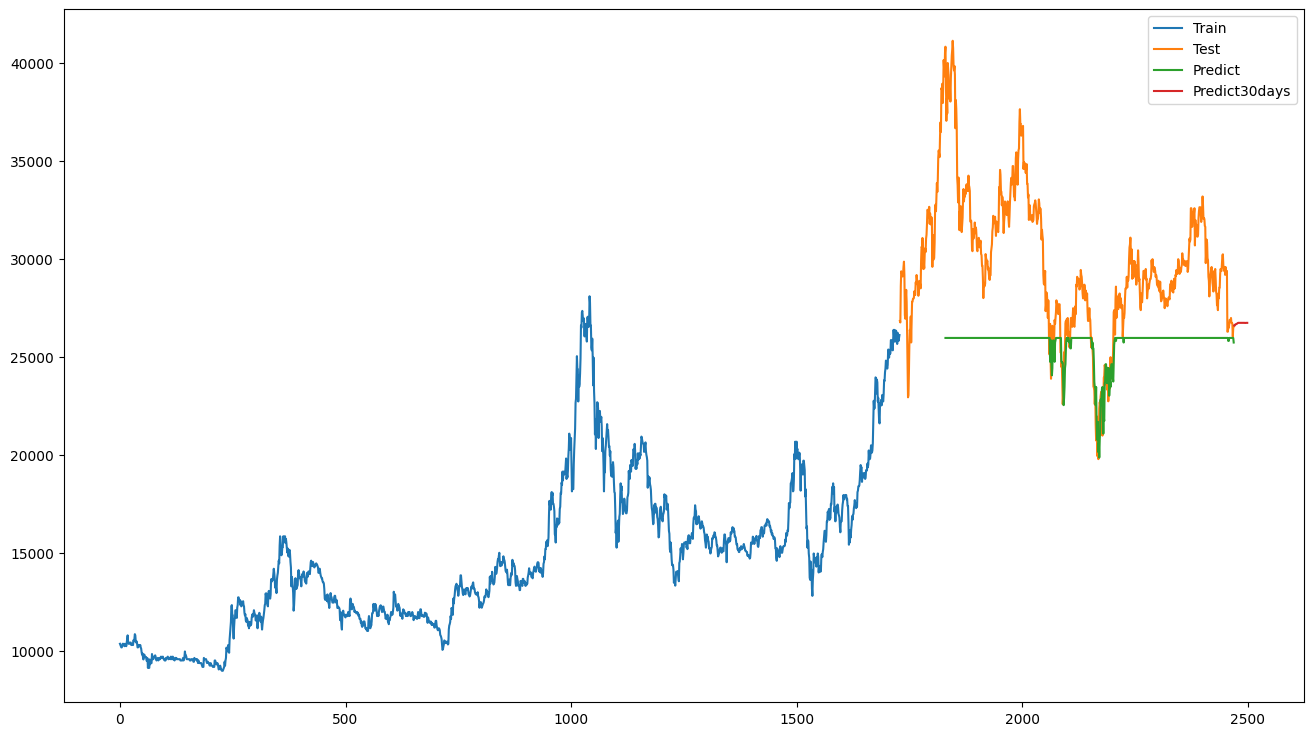

In [15]:
# 14.plots
plt.figure(figsize =(16, 9))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index,train_data1)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_data1)
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,next30days_predict_inverse)
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()